In [0]:
### WBGPS analysis functions
from wbgps import *
dbutils.library.installPyPI("pandas", "1.3.1")
my_palette = sns.color_palette(['#ce343c','#EC8A61', '#89d4b4','#0081A7', '#72C9C8', '#547474', '#8a567a', '#743D55','#b25a97', '#efb953'])

PyPI package pandas has been installed already. The previously installed package is `pandas==1.3.1`. To resolve this issue, detach and re-attach the notebook to create a new environment or rename the package.

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

import pyspark.sql.functions as F
from pyspark.sql.functions import col, desc, lit
from pyspark.sql import Window

spark.conf.set("spark.sql.shuffle.partitions", 1500)

start_baseline = '2020-02-01'
end_baseline = '2020-03-01'
start_date = '2020-02-01'
end_date = '2021-05-01'

results_dir = '/dbfs/mnt/Geospatial/results/veraset/'

bins_wealth = [0, 0.4, 0.8, 1]
bins_dist = [0, 0.4, 0.8, 1]

# countries = ['ID', 'PH', 'BR', 'CO', 'MX', 'ZA']
countries = ['PH']

c_dates = {'BR': '2021-05-01',
           'CO': '2021-05-01',
           'ID': '2021-05-01',
           'MX': '2021-05-01',
           'PH': '2021-05-01',
           'ZA': '2021-05-01',
           'AR': '2021-05-01'}

activity_level = 0.2

hw = 49
ww = 49
wa = 3600
mph = 0.2
mpw = 0.2

# Smoothing size for mobility
ma = 28
# Smoothing size for migrations
mw = 7

labels_wealth = [x+' ('+str(int(bins_wealth[i]*100))+'%-'+str(int(bins_wealth[i+1]*100)) +'%)' for i, x in zip(range(len(bins_wealth)-1), ['Low', 'Medium', 'High'])]
labels_dist = [x+' ('+str(int(bins_dist[i]*100))+'%-'+str(int(bins_dist[i+1]*100)) +'%)' for i, x in zip(range(len(bins_dist)-1), ['Low', 'Medium', 'High'])]
country_capitals = {'MX': 'Mexico City', 'BR': 'São Paulo', 'CO': 'Bogota',
                    'PH': 'Quezon City [Manila]', 'ID': 'Jakarta', 'ZA': 'Johannesburg', 'AR': 'GBuenos Aires'}

In [0]:
df_wl = pd.DataFrame()
usr_df = pd.DataFrame()
for country in countries:
    print(country)
    out, usrs = compute_rural_migration_stats_city(country, bins_wealth, labels_wealth, hw, ww, wa, mph, mpw, activity_level, c_dates)
    usr_df = pd.concat([usr_df, usrs])
    df_wl = pd.concat([df_wl, out], sort=True)

PH

Out[118]:

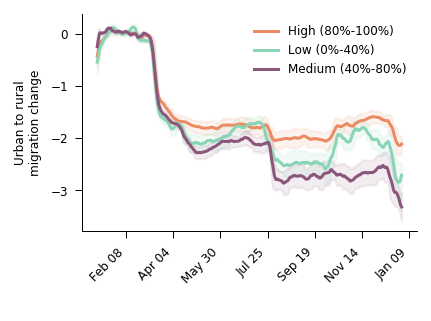

<Figure size 216x144 with 1 Axes>

In [0]:
### Cumulated: sum the difference in the number of user going from urban to roral and those coming from rural to urban
### Change: omputes the google change metric over the timeseries (either the plain difference in flows or the cumulated one depending on "cumulated" value)

### check with ollin if this makes actually sense!
mw = 7
results = pd.concat([get_migration_results(df_wl,state,change=True) for state in countries])
plot_migration(results,countries)